In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from colour.plotting import plot_chromaticity_diagram_CIE1931
from matplotlib.patches import Polygon
from color_sys import cs_srgb
import tqdm
import re
%matplotlib inline

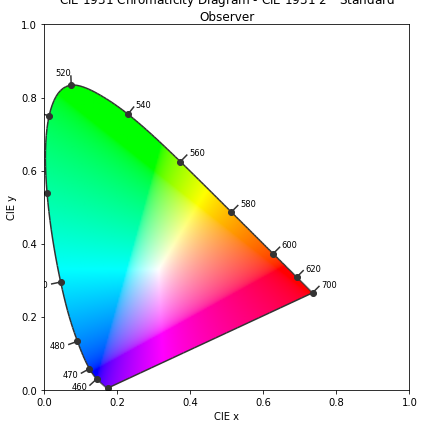

100%|██████████| 10015/10015 [00:11<00:00, 908.27it/s]


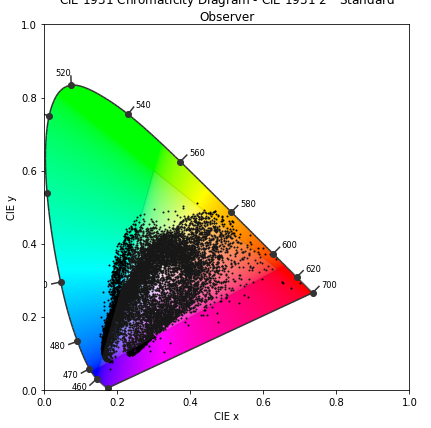

In [2]:
# load and process data
fig, ax = plot_chromaticity_diagram_CIE1931()
data = glob.glob('./color_data/*.txt')
target = []

res = {'height':[], 'gap':[], 'period':[], 'diameter':[], 'x':[], 'y':[], 'Y':[]}
for dt in tqdm.tqdm(data):
    sim_res = np.loadtxt(dt, delimiter=',')
    height, gap, period, diameter = [int(item) for item in re.findall(r'\d+', dt)]
    if len(sim_res):
        wl, r = sim_res[:, 0], sim_res[:, 1]
        x, y, Y = cs_srgb.spec_to_xyY(-r)
        target.append((x, y, Y))
        ax.scatter(x, y, c='k', s=1)
        
        res['height'].append(height)
        res['gap'].append(gap)
        res['period'].append(period)
        res['diameter'].append(diameter)
        res['x'].append(x)
        res['y'].append(y)
        res['Y'].append(Y)

srgb = Polygon(list(zip([0.64, 0.3, 0.15], [0.33, 0.6, 0.06])), facecolor='0.9', alpha=0.1, edgecolor='k')
ax.add_patch(srgb)
fig

In [3]:
sim_res

array([[ 0.38      , -0.18882906],
       [ 0.385     , -0.19837862],
       [ 0.39      , -0.20512179],
       [ 0.395     , -0.209166  ],
       [ 0.4       , -0.21076316],
       [ 0.405     , -0.21100395],
       [ 0.41      , -0.21031989],
       [ 0.415     , -0.20949165],
       [ 0.42      , -0.20895587],
       [ 0.425     , -0.20883025],
       [ 0.43      , -0.20912396],
       [ 0.435     , -0.20962161],
       [ 0.44      , -0.21013795],
       [ 0.445     , -0.21047217],
       [ 0.45      , -0.21053931],
       [ 0.455     , -0.21015131],
       [ 0.46      , -0.20915105],
       [ 0.465     , -0.20755096],
       [ 0.47      , -0.20535708],
       [ 0.475     , -0.20255361],
       [ 0.48      , -0.19904364],
       [ 0.485     , -0.19517572],
       [ 0.49      , -0.19085499],
       [ 0.495     , -0.18597102],
       [ 0.5       , -0.18074682],
       [ 0.505     , -0.17535508],
       [ 0.51      , -0.16962723],
       [ 0.515     , -0.16383242],
       [ 0.52      ,

In [47]:
import pandas as pd
import seaborn as sns

In [100]:
data = pd.DataFrame(res)
data = data[data['Y'] < 5]
data = data[:9500]

In [103]:
import pickle as pkl
pkl.dump(data, open('data_rcwa.pkl', 'wb'))

(<matplotlib.axes._subplots.AxesSubplot at 0x1a4493fa90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a4493fa90>)

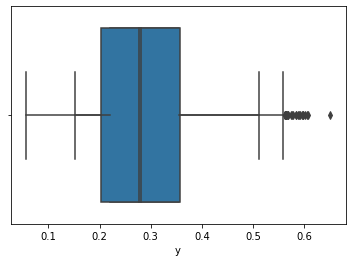

In [104]:
sns.boxplot(data['x']), sns.boxplot(data['y'])

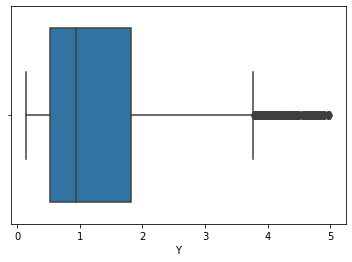

In [105]:
sns.boxplot(data['Y'])

In [107]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [110]:
# fit a linear regression model
lr = LinearRegression()
lr.fit(data[:6000, :4], data[:6000, 4:])
print('Train MSE is {:.3f}'.format(np.mean(np.sum((lr.predict(data[:6000, :4]) -  data[:6000, 4:]) ** 2, axis=1))))
print('Test MSE is {:.3f}'.format(np.mean(np.sum((lr.predict(data[6000:, :4]) -  data[6000:, 4:]) ** 2, axis=1))))

Train MSE is 2.018
Test MSE is 1.979


In [95]:
# fit a simple MLP
from sklearn.neural_network import MLPRegressor

In [96]:
mlp = MLPRegressor()
mlp.fit(X=data[:6000, :4], y=data[:6000, 4:])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [97]:
print('Test MSE is {:.3f}'.format(np.mean(np.sum((mlp.predict(data[6000:, :4]) -  data[6000:, 4:]) ** 2, axis=1))))
print('Train MSE is {:.3f}'.format(np.mean(np.sum((mlp.predict(data[:6000, :4]) -  data[:6000, 4:]) ** 2, axis=1))))

Test MSE is 0.372
Train MSE is 0.361


Test loss of neural network is much lower than that of the linear regression model.

# Things to do
1. tandem neural network
2. variational autoencoder
3. generative adversarial network

ModuleNotFoundError: No module named 'torch'